In [1]:
%%capture
%pip install qiskit qiskit-aer

In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

simulator = AerSimulator()

# Exercise 2

## 1)

In [3]:
qc = QuantumCircuit(1)
qc.ry(pi/2, 0)
qc.measure_all()
qc.draw()

┌─────────┐ ░ ┌─┐
     q: ┤ Ry(π/2) ├─░─┤M├
        └─────────┘ ░ └╥┘
meas: 1/═══════════════╩═
                       0

In [4]:
# Simulation
job = simulator.run(qc, nshots=4096)
result = job.result()
counts = result.get_counts()

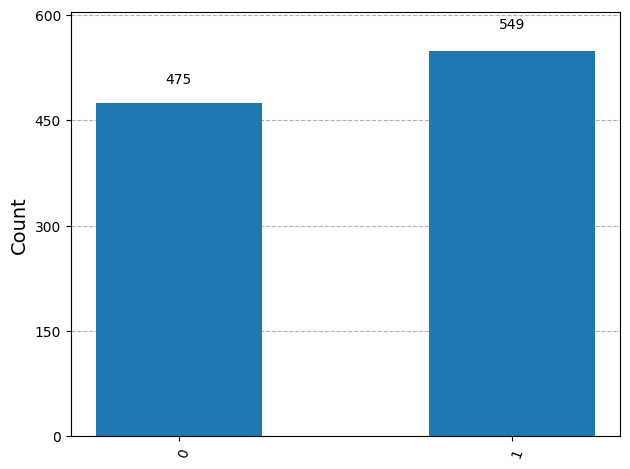

In [5]:
# Visualization
plot_histogram(counts)

## 2)

In [6]:
# Create circuit
qc = QuantumCircuit(2)
qc.ry(pi/2, 0)
qc.swap(0, 1)
qc.measure_all()
qc.draw()

┌─────────┐    ░ ┌─┐   
   q_0: ┤ Ry(π/2) ├─X──░─┤M├───
        └─────────┘ │  ░ └╥┘┌─┐
   q_1: ────────────X──░──╫─┤M├
                       ░  ║ └╥┘
meas: 2/══════════════════╩══╩═
                          0  1

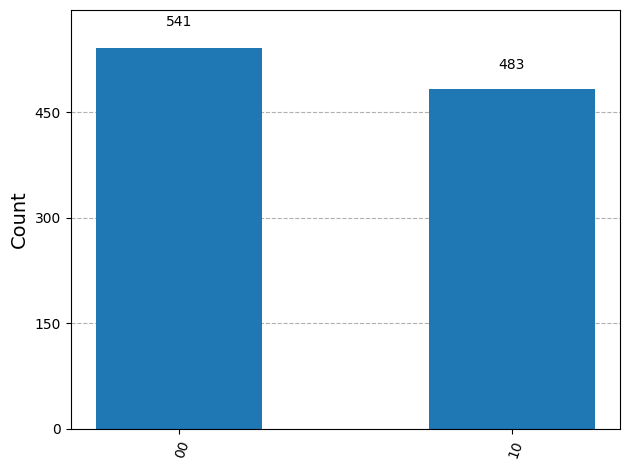

In [8]:
# Simulation
job = simulator.run(qc, nshots=4096)
result = job.result()
counts = result.get_counts()

# Visualization
plot_histogram(counts)

Note that the swap operation "swapped" also the Ry door

In [10]:
qc = QuantumCircuit(3)
qc.h(0)
qc.barrier()
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw()

┌───┐ ░           
q_0: ┤ H ├─░───■────■──
     └───┘ ░ ┌─┴─┐  │  
q_1: ──────░─┤ X ├──┼──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘

In [11]:
print(qc.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} \barrier[0em]{2} & \qw & \ctrl{1} & \ctrl{2} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \qw & \targ & \qw & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \qw & \qw & \qw & \targ & \qw & \qw\\
\\ }}
\end{document}
